In [1]:

import pandas as pd
from Pavone_Indent_Analysis import parse_file, extract_contact_points_from_data
%load_ext autoreload
%autoreload 2

In [2]:
# Parse the file
file_path = 'plate2_D08_Ind_003.txt'
metadata, data_df = parse_file(file_path)

(metadata, data_df.head())  # Displaying metadata and first few rows of the DataFrame

({'X-position (um)': '103000.3',
  'Y-position (um)': '147000.4',
  'Z-position (um)': '18374.8',
  'Z surface (um)': '18424.8',
  'Piezo position (nm) (Measured)': '-27.3',
  'k (N/m)': '0.022',
  'Tip radius (um)': '25.500',
  'Calibration factor': '2.538',
  'Device:': 'Pavone',
  'Step absolute start times (s)': '0.248,57.481,114.712',
  'P[max] (uN)': '0.043',
  'D[max] (nm)': '0.000',
  'D[final] (nm)': '0.000',
  'D[max-final] (nm)': '0.000',
  'Slope (N/m)': '0.000',
  'E[eff] (Pa)': '205.243',
  'E[v=0.500] (Pa)': '153.932',
  'Frame rate (FPS)': '41.600'},
    Time (s)  Load (uN)  Indentation (nm)  Cantilever (nm)  Piezo (nm)  \
 0     0.000  -0.000035               0.0        -1.569511   61.715771   
 1     0.001  -0.000046               0.0        -2.095680   62.155549   
 2     0.002  -0.000053               0.0        -2.386733   62.346324   
 3     0.003  -0.000056               0.0        -2.540093   62.473316   
 4     0.004  -0.000040               0.0        -1.80997

In [3]:
# Data cleaning
data_df['Z-stage (nm)'] = data_df['Piezo (nm)'] - data_df['Cantilever (nm)']

# Potentially reduce number of data points (quite excessive)
# Add columns or change for alternative units (um)
data_df.head()

,Time (s),Load (uN),Indentation (nm),Cantilever (nm),Piezo (nm),Auxiliary,Z-stage (nm)
0,0.000,-0.000035,0.0,-1.569511,61.715771,-0.000716,63.285282
1,0.001,-0.000046,0.0,-2.095680,62.155549,-0.000595,64.251229
2,0.002,-0.000053,0.0,-2.386733,62.346324,-0.000353,64.733057
3,0.003,-0.000056,0.0,-2.540093,62.473316,-0.000757,65.013409
4,0.004,-0.000040,0.0,-1.809979,62.558894,-0.000636,64.368873


In [6]:
start_idx, end_idx = extract_contact_points_from_data(data_df)

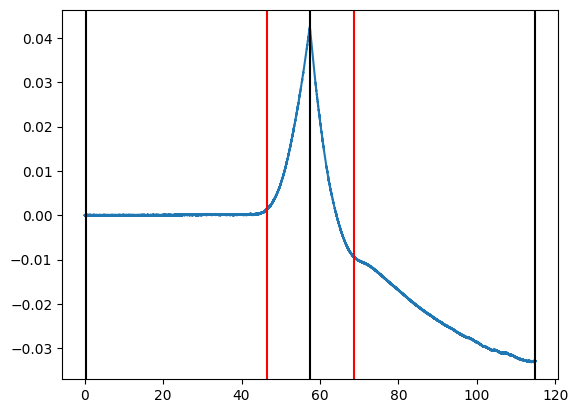

In [7]:
import matplotlib.pyplot as plt

plt.plot(data_df['Time (s)'], data_df['Load (uN)'])
plt.axvline(x=0.240, color='k')
plt.axvline(x=57.471, color='k')
plt.axvline(x=114.703, color='k')
plt.axvline(x=data_df['Time (s)'][start_idx], color='r')
plt.axvline(x=data_df['Time (s)'][end_idx], color='r')

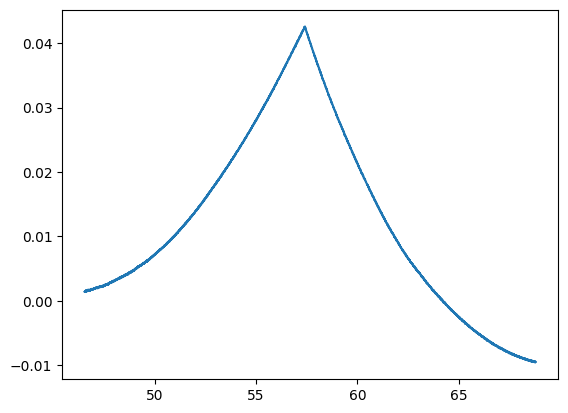

In [11]:
plt.plot(data_df['Time (s)'][start_idx:end_idx], data_df['Load (uN)'][start_idx:end_idx])

In [8]:
data_df.keys()

Index(['Time (s)', 'Load (uN)', 'Indentation (nm)', 'Cantilever (nm)',
       'Piezo (nm)', 'Auxiliary', 'Z-stage (nm)'],
      dtype='object')

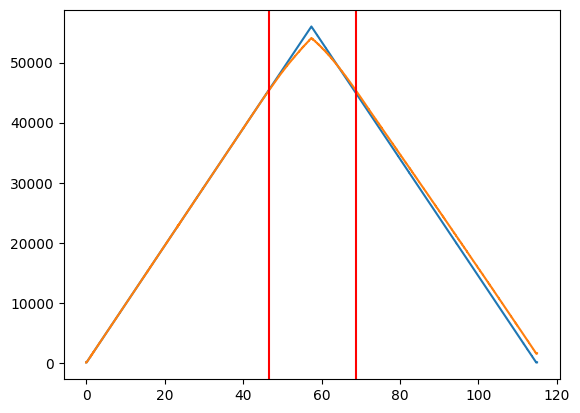

In [9]:
import numpy as np
plt.plot(data_df['Time (s)'], data_df['Piezo (nm)'])
plt.plot(data_df['Time (s)'], data_df['Piezo (nm)'] - data_df['Cantilever (nm)'])
plt.axvline(x=data_df['Time (s)'][start_idx], color='r')
plt.axvline(x=data_df['Time (s)'][end_idx], color='r')

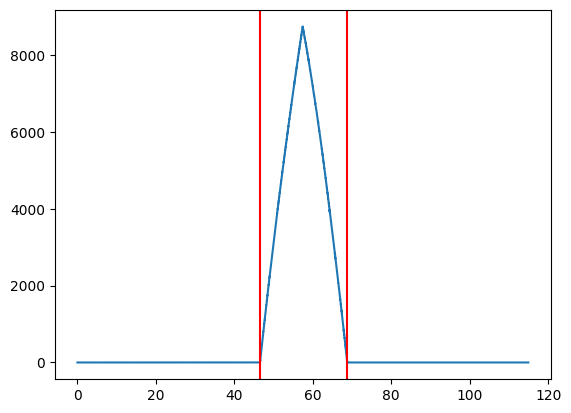

In [10]:
start_idx = 46547
end_idx = 68790

plt.plot(data_df['Time (s)'], data_df['Indentation (nm)'])
plt.axvline(x=data_df['Time (s)'][start_idx], color='r')
plt.axvline(x=data_df['Time (s)'][end_idx], color='r')